In [1]:
%autosave 10

Autosaving every 10 seconds


In [3]:
#Testing the autosave function

In [5]:
#Now this is testing the automatic github pushing, is this working?

In [7]:
#Yes it is! Yay!

In [9]:
#Restarted the kernel, does it work now?

In [ ]:
#It does, into bash, you have to type the following: "python auto_commit.py"

### Continuing ML Tutorials and learning how to autosave on Github

### (That is what the above functions are showing)

# Now, we will do Neural Network for Cancer Prediction

## This tutorial is devised from Vappiah's Bioinformatics Projects for learning ML

### We will use RNA-seq data that was processed for differential gene expression in cancer types. The data we use is from https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq and will be a tabular data set

### The rows are cancer samples and the columns and gene counts, the last column is cancer categories

In [28]:
#We need the following libraries
import pandas as pd
import numpy as np

In [32]:
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#Preprocessing the data before ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [38]:
#For classification of the ML model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [44]:
#Let's read our data! (here, we use it from a github repo)
file_url='https://github.com/vappiah/Machine-Learning-Tutorials/raw/main/data/cancer_gene_expression.zip'
dataframe=pd.read_csv(file_url)

In [ ]:
#Now, let's explore the data we will study and clean it

In [45]:
print(dataframe.shape)

(801, 8001)


In [48]:
#To check columns 1-3
print(dataframe.columns[0:3])

Index(['gene_1', 'gene_2', 'gene_3'], dtype='object')


In [50]:
#To check last column
dataframe.columns[-1]

'Cancer_Type'

In [52]:
#What data is missing?
datanul=dataframe.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


In [54]:
#How many cancer types, or in our purposes, classes?
print(dataframe['Cancer_Type'].value_counts())

Cancer_Type
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


In [58]:
#Preprocess data 
X=dataframe.iloc[:,0:-1]
y=dataframe.iloc[:,-1]

In [62]:
#Encoding labels
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y)
nclasses=np.unique(y).shape[0]

In [ ]:
#Split data into three sections: training, validation, and test sets

In [68]:
#For training and test sets: for training and testing the model after training and fine tuning
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
#training and validation sets for training and evalutating the model during training

In [66]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

In [ ]:
#Need to scale my data and normalize it to make sure all our values are in the same range
#To improve model performance avoid bias

In [70]:
# We will do it separately on each data set to prevent data leaking
min_max_scaler=MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)
X_val=min_max_scaler.fit_transform(X_val)
X_test=min_max_scaler.fit_transform(X_test)

In [ ]:
#Now, we build the neural network model, a ML model with interconnected nodes to mimic a human brain

In [96]:
from keras.models import Sequential
from keras.layers import Dense

In [116]:
#Define the model
model = Sequential()

In [118]:
#This ML model has layers, so we will add each layer

In [120]:
#Hidden layer 1
model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [122]:
#hidden layer 2
model.add(Dense(20, activation='relu'))

In [124]:
#output layer
model.add(Dense(nclasses, activation='softmax'))

In [126]:
#define optimizer and learning rate using adam optimizer (there are others)
opt_adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=opt_adam, metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [128]:
#Just checking what my model looks like now
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 40)             │       320,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 5)              │           105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,965 (1.22 MB)

 Trainable params: 320,965 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [130]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])


In [132]:
#Fit model to training data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32,epochs=200, verbose=1)

Epoch 1/200


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(32,), output.shape=(32, 5)

In [ ]:
#There were some errors in the above code, so let's trouble shoot. We can use a technique to one-hot encode your labels
#  Likely because the shapeof the training data does not match the model data
#See below: 

In [134]:
from tensorflow.keras.utils import to_categorical

In [136]:
num_classes = len(set(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)

In [138]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [140]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    batch_size=32,
                    epochs=200,
                    verbose=1)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3591 - loss: 1.7885 - val_accuracy: 0.4453 - val_loss: 1.2378
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4657 - loss: 1.2141 - val_accuracy: 0.6406 - val_loss: 0.9212
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5318 - loss: 0.9862 - val_accuracy: 0.7344 - val_loss: 0.6182
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6812 - loss: 0.6908 - val_accuracy: 0.8828 - val_loss: 0.5262
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9203 - loss: 0.5048 - val_accuracy: 0.9766 - val_loss: 0.2640
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9751 - loss: 0.3279 - val_accuracy: 0.9922 - val_loss: 0.1679
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9913 - loss: 0.2151 - val_accuracy: 1.0000 - val_loss: 0.1002
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9919 - loss: 0.1542 - val_accuracy: 1.0000 - v

In [144]:
y_test = to_categorical(y_test, num_classes=num_classes)

In [148]:
#make predictions about my data
predictions = np.argmax(model.predict(X_test), axis=1)
print("Predicted Classes:", predictions)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predicted Classes: [3 1 2 0 4 0 2 0 1 0 0 2 0 3 4 0 0 0 4 1 2 3 0 0 4 0 0 2 0 3 3 0 3 3 0 0 4
 0 1 2 4 0 0 4 0 0 0 3 1 4 0 0 0 4 1 2 4 0 0 1 3 2 4 2 0 4 3 0 3 0 0 2 3 3
 0 4 0 4 4 1 0 3 0 0 2 0 0 0 4 0 1 3 1 4 1 2 1 3 0 0 2 2 2 0 3 0 2 0 1 4 0
 0 4 4 3 0 0 4 0 0 0 3 4 4 0 4 0 2 3 3 0 0 4 1 3 2 0 4 3 2 2 2 4 0 0 1 0 1
 4 0 0 1 0 2 0 2 1 3 3 2 0]


In [152]:
#get predictions of first 20 samples
for index, entry in enumerate(predictions[0:20]):
    print(f'Predicted: {entry}, Actual: {y_test[index]}')

Predicted: 3, Actual: [0. 0. 0. 1. 0.]
Predicted: 1, Actual: [0. 1. 0. 0. 0.]
Predicted: 2, Actual: [0. 0. 1. 0. 0.]
Predicted: 0, Actual: [1. 0. 0. 0. 0.]
Predicted: 4, Actual: [0. 0. 0. 0. 1.]
Predicted: 0, Actual: [1. 0. 0. 0. 0.]
Predicted: 2, Actual: [0. 0. 1. 0. 0.]
Predicted: 0, Actual: [1. 0. 0. 0. 0.]
Predicted: 1, Actual: [0. 1. 0. 0. 0.]
Predicted: 0, Actual: [1. 0. 0. 0. 0.]
Predicted: 0, Actual: [1. 0. 0. 0. 0.]
Predicted: 2, Actual: [0. 0. 1. 0. 0.]
Predicted: 0, Actual: [1. 0. 0. 0. 0.]
Predicted: 3, Actual: [0. 0. 0. 1. 0.]
Predicted: 4, Actual: [0. 0. 0. 0. 1.]
Predicted: 0, Actual: [1. 0. 0. 0. 0.]
Predicted: 0, Actual: [1. 0. 0. 0. 0.]
Predicted: 0, Actual: [1. 0. 0. 0. 0.]
Predicted: 4, Actual: [0. 0. 0. 0. 1.]
Predicted: 1, Actual: [0. 1. 0. 0. 0.]


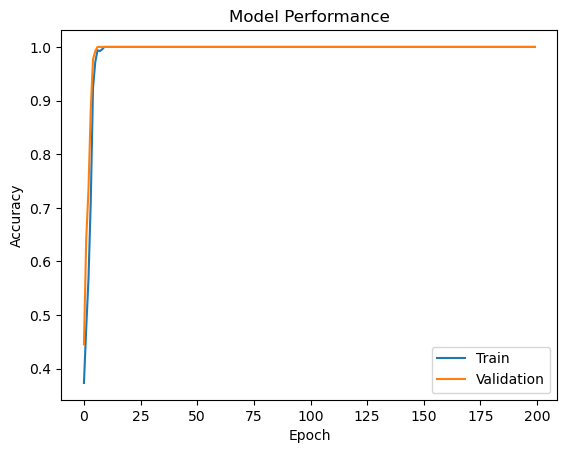

In [158]:
#summarize the history for accuracy vs for loss:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

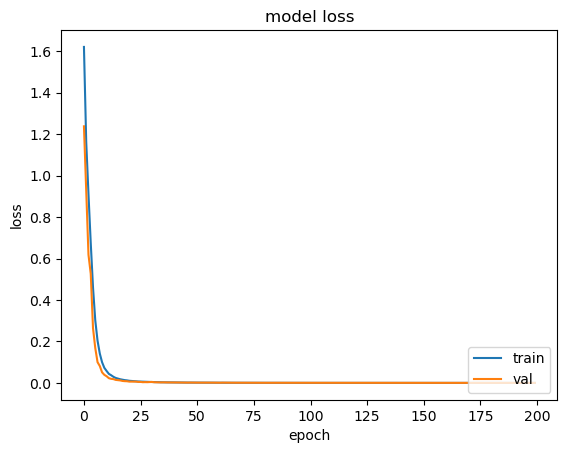

In [156]:
#For loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
###Now let's discuss:
#The accuracy plot shows